# Assignment 3 – Q-Learning

The primary description of this coursework is available on course page page. This is the Jupyter notebook you must complete and submit to receive marks. 

**You must follow all instructions given in this notebook.**

Restart the kernel and run all cells before submitting the notebook. This will guarantee that we will be able to run your code for testing.

Remember to save your work regularly. 

## Assignment Details

This assignment has two parts, both are contained within this one notebook. You are welcome to write code separately (e.g. in an IDE like Pycharm) which you then copy into the notebook to submit, but you must make sure the notebook runs without any additional resources.

In part one you will write an agent that learns how to play Connect Three using the Q-learning algorithm – repeatedly playing the game against a random opponent and learning from the results. Use initial Q-values of zero, and a discount factor $ \gamma = 1 $. Choices of other parameters are up to you. 

To demonstrate your results you will produce a *learning curve*, a graphical plot showing the learning rate of your algorithm, comparing its performance to a random agent. You will also need to write a modified version of your code which produces a simplified version of the graph which we can run. Detailed instructions are available below.

This part is worth 80% of the assignment. Intelligent choices in creating an algorithm which learns more effectively will result in a higher grade. A grade of 60/80 is possible by implementing the basic version of the algorithm described in the material. To go beyond this will require creativity that is unguided.

In part two you will write a short amount of text explaining your implementation, any decisions or extensions you made, and what parameter values you used. This part is worth 20% of the assignment.

## Connect Three

You saw Connect Three already in an ungraded activity on adversarial search (week 3). As a reminder, players alternate playing pieces of their colour into any non-full column of a grid. The pieces will fall down as far as possible. The objective is to get three of the same pieces in a line: horizontal, vertical, or diagonal. In this version the board will be 5 columns wide and 3 rows high. An example is shown below showing a win for the red player.

<img src="images/connect3.png" width=200 />

**Your opponent is always the first player. Your agent is always the second player.**

The supporting code for this assignment includes the class from that week 3 activity, the class `Connect`. You can revisit that activity to see a demonstration of its features and how a game is played.

If you made any modifications to the `Connect` class in the previous activity that you think will be helpful to use here, you are welcome to port them over.

There is also some additional supporting code below to help you start, and to aid with creating the graph to demonstrate your results. *You my modify this code as you wish.*

## Preliminaries

For your reference, below is a visual depiction of the agent-environment interface in reinforcement learning. The interaction of the agent with its environments starts at decision stage $t=0$ with the observation of the current state $s_0$. (Notice that there is no reward at this initial stage.) The agent then chooses an action to execute at decision stage $t=1$. The environment responds by changing its state to $s_1$ and returning the numerical reward signal $r_1$. 

<br /><img src="images/agent-environment.png" width=500 /><br />

Since Connect Three is a two-player game, your agent only plays every other turn. After taking action $a_t$ the opponent gets a chance to move. Your code must simulate this, but from the perspective of the reinforcement learning problem, this is still just one time step. The next state $s_{t+1}$ will have your agents move (caused by $a_t$) *and* the opponent's response. 

From the perspective of your Q-learning agent, it is just playing a game against an environment that acts unpredictably. In that way, Connect Three is not totally dissimilar from Tetris!

## Q-Learning
### Agent Implementation
**Your opponent is always the first player. Your agent is always the second player.**

For your reference, a modified version of the pseudocode for Q-learning from the textbook is reproduced below (Reinforcement Learning, Sutton & Barto, 2018, Section 6.5).

<img src="images/q_learning.png" width=600 />

You are free to implement this part of the assignment however you like. There is some very basic skeleton code below, which you do not have to use. Here are some more hints to help you get started:

The algorithm requires a table of values $Q(s, a)$ which should all be set to zero initially. You could try to create a table (2D list structure, or a 2D numpy array), however this will pose some initial difficulty in trying to enumerate every possible state (i.e. every possible board position).

A more sensible choice might be to create the table as you go. If you need to query a state that does not currently exist, you can create a new row for it, with all the values starting at zero. A Python dictionary, or [`defaultdict`](https://docs.python.org/3.7/library/collections.html#collections.defaultdict), are both good options for this.

Also ask how you will actually query this table. Each column is a possible action, so we can just use integers to index the actions available for each state. But what do we use for the state? The current game grid is available by calling `game.grid`. However, this is a 2D numpy array, which cannot be used as the index to a table (or as a key in a dictionary). You will need to find some way to transform this grid into a suitable type. Be careful that you do not accidentally modify the game's grid directly.

Once you have your agent with its Q-table, you can write a method which repeatedly plays the game over and over. Make sure you keep track of rewards from actions, particularly as your code will need to simulate the move of the other player. When your agent plays a piece, the environment returns a reward value indicating whether it was a winning move. Then you will need to simulate the move of a random opponent, which will again return a reward value. Make sure these values are fed back into your agent's learning procedure correctly.

### Learning Curve
Once you have written your agent, you must create a **learning curve** following these directions. We will refer to this image as Plot 1. There is some demo code directly below this cell which demonstrates an example test of a random agent.

After $n$ steps of interaction with the environment, play $m$ games with the current policy of the agent (without modifying the policy). Think of this as interrupting the agent for a period of time to test how well it has learned so far. Your plot should show the total score obtained in these $m$ games as a function of $n, 2n, 3n, \dots, kn$. The choices of $n$ and $k$ are up to you. They should be reasonable values that demonstrate the efficiency of the learning and how well the agent learns to play the game eventually. Use $m=10$. 

This plot should show the mean performance of `a` agents, not the performance of a single agent. Because of the stochasticity in the environment, you will obtain two different learning curves from two different agents even though they are using exactly the same algorithm. We suggest setting `a` to 20 or higher.

Present a single mean learning curve with your choice of parameters $\varepsilon$ and $\alpha$. The plot should also show (as a baseline) the mean performance of a random agent that does not learn but chooses actions uniformly randomly from among the legal actions. Label this line “Random Agent”. 

You must include Plot 1 as an image in the appropriate cell below. That is, compute the learning curve on Azure notebooks or your own machine (this may take a few minutes depending on your implementation) and save the figure in the same directory as your notebook. Import this figure in the appropriate answer cell under (A) in Part Two below. The markdown cell includes a sample of how to embed an image. You can also look at the source code of this markdown cell (double click on it!) to see how the pseudocode image was embedded above. Do **not** use drag & drop to include figures; we would not be able to see them! Make sure to include the image(s) in your submission zip file. 

In [ ]:
# # This cell demos how we can test a random agent and draw a learning curve
# # You can reuse this code in your own submission

# import connect
# import numpy as np
# import matplotlib.pyplot as plt

# %matplotlib inline

# class RandomAgent():
#     def choose_action(self, env):
#         action = np.random.choice(np.array(env.available_actions))
#         return action

    
# def play(env, player_o, player_x, episodes=1):
#     rewards_per_episode = np.zeros(episodes)
#     for episode in range(episodes):
#         env.reset()
#         # Let random player play first!
#         x_action_index = player_x.choose_action(env)
#         reward, game_over = env.act(x_action_index)
#         while not game_over:
#             o_action_index = player_o.choose_action(env)
#             reward, game_over = env.act(o_action_index)
#             if not game_over:
#                 x_action_index = player_x.choose_action(env)
#                 reward, game_over = env.act(x_action_index)
#         rewards_per_episode[episode] = reward
#     return rewards_per_episode

# env = connect.Connect(verbose=False)

# m = 10
# n = 200
# k = 30

# # Test a random agent at episodes 0, n, 2n, ...., kn for m games.
# np.random.seed(3)
# rewards = np.zeros(k)

# # player_o is the agent to test
# # player_x should always be a random agent
# player_o = RandomAgent()
# player_x = RandomAgent()

# for kx in range(k):
#     rewards_per_episode = play(env,
#                                player_o=player_o,
#                                player_x=player_x,
#                                episodes=m)
#     mean_reward = np.mean(rewards_per_episode)
#     rewards[kx] = mean_reward

# line1, = plt.plot(rewards)
# plt.legend([line1], ["Random Agent"])
# plt.show()

This image can be saved in most browsers by right-clicking the image and selecting "save image as" (or equivalent). 

Notice that only one random agent is tested for the plot above. For your submission version of Plot 1 you are expected to average the results over many agents for both your own learning agent *and* the random agent.

## Part One – Implementation (80%)
### Part 1A – Agent and Graph Code
Write all of your code for part one below this cell (you can insert more cells if you like). This must include the code for your Q-learning agent and the code which produces the learning curve graph. You must also embed your final graph as an image below this cell (see below).

Before submission, you must comment out the code which produces your final multi-agent graph. There are more details in the "how to submit" section below.

In [1]:
### Write all your code for part one within or above this cell. 

import connect
import random
import operator
import numpy as np
import matplotlib.pyplot as plt



def qLearn(epsilon, alpha, episodes, QTable):
    # Repeat for each episode
    for i in range(episodes):
        epsilon = epsilon * (1 / (len(QTable) + 1))
        env = newEnv()
        env.act(action=opponentMove(env))
        currState = str(env.grid)

        while True:
            env.change_turn()
            availableActions = env.available_actions
            selectedAction = greedyChooseAction(epsilon, availableActions, currState, QTable)
            env.act(action=selectedAction)

            if (env.was_winning_move()):
                reward = 1
                QTable[currState, selectedAction] = ((1 - alpha) * QTable[currState, selectedAction]) + (
                        (alpha) * (reward + maxQ(env.available_actions, str(env.grid), QTable)))
                break
            elif env.grid_is_full():
                reward = 0
                QTable[currState, selectedAction] = ((1 - alpha) * QTable[currState, selectedAction]) + (
                        (alpha) * (reward + maxQ(env.available_actions, str(env.grid), QTable)))
                break
            else:
                env.change_turn()
                env.act(action=opponentMove(env))
                if env.was_winning_move():
                    reward = -1
                    QTable[currState, selectedAction] = ((1 - alpha) * QTable[currState, selectedAction]) + (
                            (alpha) * (reward + maxQ(env.available_actions, str(env.grid), QTable)))
                    break
                elif env.grid_is_full():
                    reward = 0
                    QTable[currState, selectedAction] = ((1 - alpha) * QTable[currState, selectedAction]) + (
                            (alpha) * (reward + maxQ(env.available_actions, str(env.grid), QTable)))
                    break
                else:
                    reward = 0
                    QTable[currState, selectedAction] = ((1 - alpha) * QTable[currState, selectedAction]) + (
                            (alpha) * (reward + maxQ(env.available_actions, str(env.grid), QTable)))
                    currState = str(env.grid)

    return QTable


def greedyChooseAction(epsilon, availableActions, state, QTable):
    if len(availableActions) == 1:
        return availableActions[0]

    # Create sorted list of pairs of type (action, value)
    actionValues = []

    for action in availableActions:
        QValue = QTable.get((state, action), 0)
        actionValues.append((action, QValue))
        # If the default value is used, this means this state/action pair doesn't exist in the QTable, so add it
        if QValue == 0:
            QTable[(state, action)] = 0

    # Sort this list based on the value of the action, in descending order
    actionValues.sort(key=operator.itemgetter(1), reverse=True)

    # Pick the best action, or on occasion, another random action
    if random.random() < epsilon:
        chosenAction = (actionValues[random.randint(1, len(actionValues) - 1)])[0]
    else:
        chosenAction = (actionValues[0])[0]
    return chosenAction


def maxQ(availableActions, state, QTable):
    # Create sorted list of pairs of type (action, value)
    actionValues = []
    for action in availableActions:
        QValue = QTable.get((state, action), 0)
        actionValues.append((action, QValue))
        # If the default value is used, this means this state/action pair doesn't exist in the QTable, so add it
        if QValue == 0:
            QTable[(state, action)] = 0

    # Sort this list based on the value of the action, in descending order
    actionValues.sort(key=operator.itemgetter(1), reverse=True)

    if (len(actionValues) == 0):
        return 0
    else:
        # Pick the value of the best action
        bestActionValue = (actionValues[0])[1]

        return bestActionValue


def newEnv():
    env = connect.Connect(verbose=False)
    env.reset(first_player='x')
    return env


def opponentMove(env):
    availableActions = env.available_actions
    selectedActionIndex = random.randint(0, len(availableActions) - 1)
    selectedAction = availableActions[selectedActionIndex]
    return selectedAction


def playGames(QTable, m):
    env = connect.Connect(verbose=False)
    gamesWon = 0

    for i in range(m):
        env.reset(first_player='x')

        while True:
            env.act(action=opponentMove(env))
            if env.was_winning_move() or env.grid_is_full():
                break

            env.change_turn()

            env.act(action=agentMove(env, QTable))
            if env.was_winning_move():
                gamesWon += 1
                break
            elif env.grid_is_full():
                break
            else:
                env.change_turn()

    return gamesWon / m


def agentMove(env, QTable):
    availableActions = env.available_actions
    state = str(env.grid)

    if len(availableActions) == 1:
        return availableActions[0]

    # Create sorted list of pairs of type (action, value)
    actionValues = []

    for action in availableActions:
        QValue = QTable.get((state, action), 0)
        actionValues.append((action, QValue))
        # If the default value is used, this means this state/action pair doesn't exist in the QTable, so add it
        if QValue == 0:
            QTable[(state, action)] = 0

    # Sort this list based on the value of the action, in descending order
    actionValues.sort(key=operator.itemgetter(1), reverse=True)

    # Pick the best action, or on occasion, another random action
    chosenAction = (actionValues[0])[0]

    return chosenAction


def plotPerformanceOneAgent(k, n, m):
    scores = []
    optimalQ = dict()

    for i in range(k):
        # Interact with environment n times
        optimalQ = qLearn(0.2, 0.6, n, optimalQ)

        # Play m games & add percentage won to scores list
        scores.append(playGames(optimalQ, m))

    return scores


def plotPerformance(k, n, m, a):
    scores = ()

    for i in range(a):
        scores = scores + (plotPerformanceOneAgent(k, n, m),)

    allScores = np.column_stack(scores)

    averages = []

    for i in range(len(allScores)):
        averages.append(np.mean(allScores[i]))

    # plot graph
    plt.xlabel("Environment Interactions")
    plt.ylabel("Percentage of games won")
    x = np.arange(0, (n * k), n)
    plt.plot(x, averages)


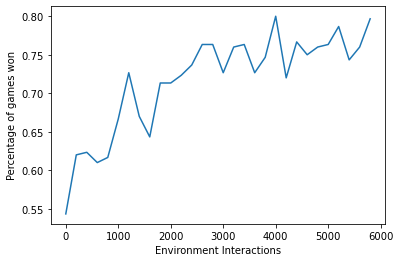

In [2]:
#plotPerformance(30, 200, 10, 30)

### Part 1B – Plot 1 Image
Insert your static learning curve (Plot 1) here. Double click the cell to edit, and replace the file name of the image below with that of your graph. You must also make sure to include the image file in the zip file for your submission.

<img src="Plot1.png" />

### Part 1C – Modified Code
In the cell below, make it possible for us to produce from scratch a learning curve similar to Plot 1 *but for a single agent*, for a $k$ value of your own choosing. You do not need to include the baseline for random play.  This code should run in less than 60 seconds (ours runs in 5 seconds).

Time of excecution in seconds 8.680762529373169


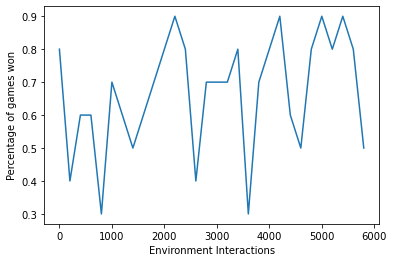

In [5]:
### This cell should produce from scratch a plot showing a learning curve for a single agent.

import time

start = time.time()

plotPerformance(30, 200, 10, 1)

end = time.time()
print("Time of excecution in seconds", end - start)



## Part Two – Analysis
In this part you will write a short discussion and analysis of your implementation in the cell below. 
* Short means approximately 300 words. There are no hard limits but overly long answers may be penalised.
* You may wish to discuss the following topics:
 * What are your conclusions from Plot 1? How close does your (average) agent get to the best possible level of performance? How efficiently does your (average) agent learn? 
 * Explain the key aspects of your implementation. How many state-action pairs do you represent in your Q-table? Describe and justify your settings of $\alpha$ and $\varepsilon$. Are there any things you tried out that are not in your final implementation?
 * What modifications did you make (if any) to the basic algorithm? Do you have any other ideas for how you could improve the efficiency that you did not try?

YOUR ANSWER HERE (double click to edit)

# IMPORTANT: How to submit

If any of the following instructions is not clear, please ask well ahead of the submission deadline.

### Before you submit
- We will not be able to mark your coursework if it takes more than 1 minutes to execute your entire notebook. So you must comment out (but *do not delete*) the code that you used to produce Plot 1 (i.e., learning curve averaged across many agents). Do **not** comment out the code that you use to produce a learning curve for a single agent (Part 1C).
- As usual, restart the kernel (Kernel $\rightarrow$ Restart & Run All) and make sure that you can run all cells from top to bottom without any errors.

### Submission file
- Please upload your completed Jupyter notebook (`ai3_connectthree.ipynb`) as well as the pre-computed figure(s) directly. If you go over the file limit, please a bundle your files in a `.zip` archive (**not** `.rar`, `.7z`, or any other archive format).
- **If** you change the `connect.py` file or write your own version of the environment, include the corresponding file in your submission, but give it any other name than `connect.py`. If you do not change its name, it will be overwritten and we won't be able to execute your code! Make sure that you import the correct module when you rename your file, for example, use `import myConnect` if your file is called `myConnect.py`.
- Do not include any identifying information. Not in the code cells, not in the file names, nowhere! Marking is anonymous.